## EDA Vehicle Insurance Claims

### Dataset

This is an vehicle insurance dataset "carclaims" that is publicly available in Kaggle through this [ link](https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection/data). 

The dataset has 32 features in a total of which 6 are ordinal, 25 are categorical, and finally, the class variable that contains the label – “fraud” or “not-fraud”. It consists of 15,420 records of which only 6% (923 records) are fraudulent which indicates a high class imbalance.

In [1]:
import pandas as pd

df= pd.read_csv('data/carclaims.csv')

In [2]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
print("shape: ", df.shape)
df.info()

shape:  (15420, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber    

#### Columns review:

In [4]:
# have a look at all the columns name to get better understanding
print(df.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')


Listing out the unique values in each columns:

In [5]:
for column in df.columns:
    print(column + ':' + str(df[column].unique()))

Month:['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth:[5 3 2 4 1]
DayOfWeek:['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make:['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea:['Urban' 'Rural']
DayOfWeekClaimed:['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed:['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed:[1 4 2 3 5]
Sex:['Female' 'Male']
MaritalStatus:['Single' 'Married' 'Widow' 'Divorced']
Age:[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault:['Policy Holder' 'Third Party']
PolicyType:['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'


In [6]:
# check for missing values in each column
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [7]:
# get summary statistic for numerical features

df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [8]:
print('Those with age=0 and their policy holder age count:\n{}'.format(df[df.Age == 0].AgeOfPolicyHolder.value_counts()))
df.AgeOfPolicyHolder.value_counts()

Those with age=0 and their policy holder age count:
AgeOfPolicyHolder
16 to 17    320
Name: count, dtype: int64


AgeOfPolicyHolder
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: count, dtype: int64

So we need to fix this later in the data cleaning part but the rest of the nomimal features seem fine.

#### Class distribution

In [9]:
df.FraudFound.value_counts(normalize=True)

FraudFound
No     0.940143
Yes    0.059857
Name: proportion, dtype: float64

As clarified earlier, this is an inbalance dataset with ~6% target is fraud.

#### Correlation matrix:

In [10]:
df.corr(numeric_only=True)

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,0.025944,-0.007063,0.069420,0.001668,0.025197
PolicyNumber,-0.007797,0.011665,0.025944,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,0.936513,0.009338,-0.001170,-0.013890,1.000000


High correlation between "Year" and "Policy Number": This is expected if policy numbers are assigned sequentially over time.

This may indicate redundancy, we might consider dropping one for modeling later.

#### Visualize Feature Distribution

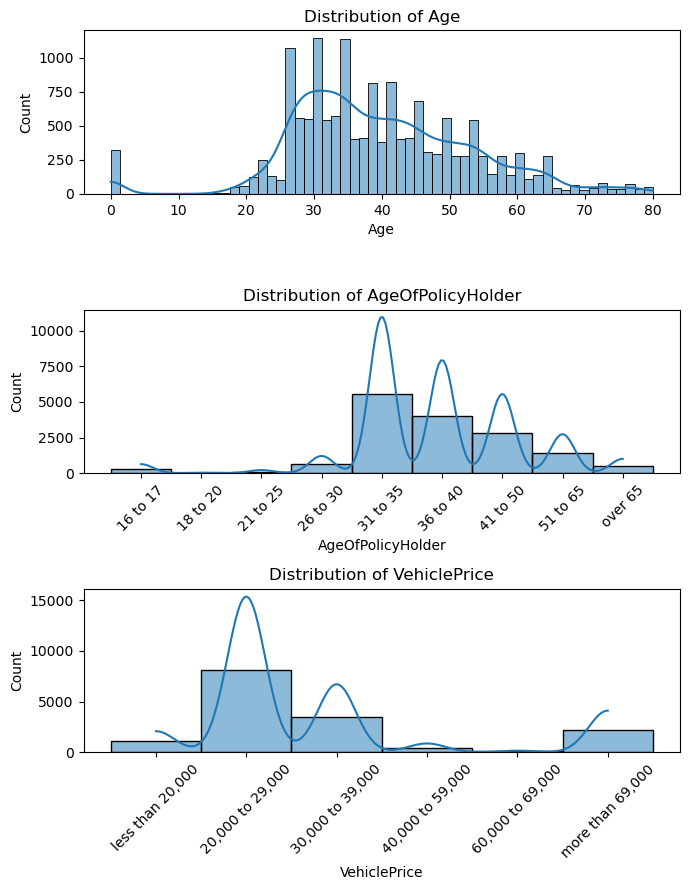

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['Age', 'AgeOfPolicyHolder', 'VehiclePrice']  # replace with your actual column names

age_order = [
    '16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35',
    '36 to 40', '41 to 50', '51 to 65', 'over 65'
]
vehicle_price_order = [
    'less than 20,000', '20,000 to 29,000', '30,000 to 39,000',
    '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000'
]

# Set as categorical with order
df['AgeOfPolicyHolder'] = pd.Categorical(df['AgeOfPolicyHolder'], categories=age_order, ordered=True)
df['VehiclePrice'] = pd.Categorical(df['VehiclePrice'], categories=vehicle_price_order, ordered=True)

fig, axes = plt.subplots(len(num_features), 1, figsize=(7, 3 * len(num_features)))
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    # Angle x labels for 2nd and 3rd plots
    if i in [1, 2]:
        axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df[df.AgeOfPolicyHolder == '36 to 40'].Age.value_counts()

Age
39    435
41    423
44    411
37    410
36    406
43    404
42    401
45    386
38    384
40    383
Name: count, dtype: int64

Cleaning lists:

1. Replace age 0 with appropriate value (age and age of policy holder also strongly correlated)
2. value encoding for the categorical features
3. remove either year/policy number as they are redundant (strongly correlated)